# Introduction to Object-Oriented Programming in Java



## A Note on Organizing And Running Java Code

Like with its syntax, Java has strict rules about code organization.

First, each public class must be in its own file named exactly like the class but with `.java` extension. So, if I want to write a `Laptop` class, the filename must be `Laptop.java` - case-sensitive. You can have non-public classes in the same file, but it's best to separate them. I know we are getting ahead - talking about organizing classes even before we even write them but getting a rough idea for where to put things beforehand is a good idea.

All Java projects must have a `Main.java` file with the `Main` class. This is where you test your classes by creating objects off of them. 

To run Java code, we'll use [IntelliJ IDEA](https://www.jetbrains.com/idea/), a popular Java IDE. After installing IntelliJ:

1. Create a new Java project (File > New > Project)
2. Right-click the src folder and create the `Main.java` file and paste the following contents:

```java
public class Main {
    public static void main(String[] args) {
        // Create and tests objects here
        
    }
}
```

Whenever we are talking about classes, we write code in other files than the `Main.java` file. But if we are talking about creating and testing _objects_, switch to `Main.java`.

To run the program, you can click the green play button next to the main method:

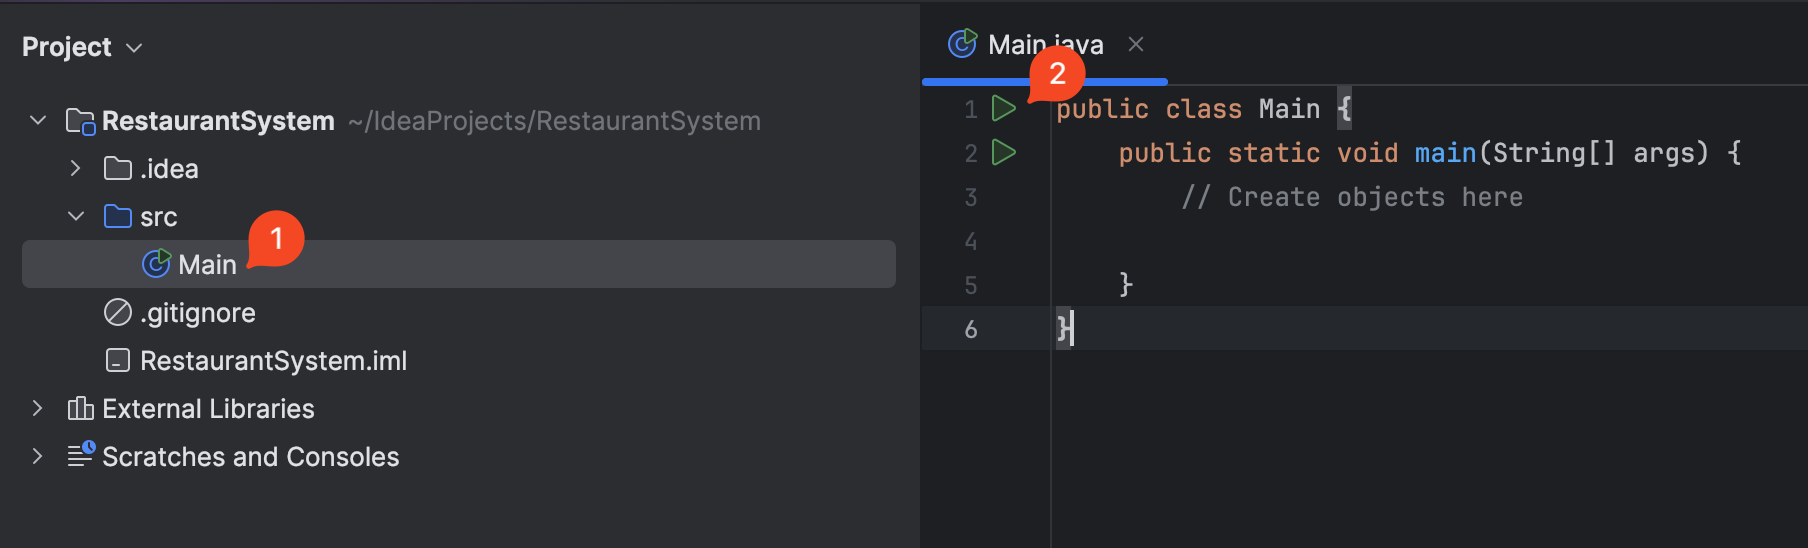 

The output will be shown in the Run tool window at the bottom.

If you are completely new to Java, please check out our [Introduction to Java course](https://www.datacamp.com/courses/introduction-to-java) that covers the fundamentals like Java data types and control flow before continuing.

Otherwise, let's dive right in.

## Classes and Objects

So, what are classes, exactly?

Classes are programming constructs in Java for representing real-world concepts. For example, consider this `MenuItem` class (yes, you should create a file for it):

```java
public class MenuItem {
    public String name;
    public double price;
}
```

The class gives us a blueprint or a template to represent various menu items in a restaurant. By changing the class's two attributes, `name` and `price`, we can create countless menu __objects__ like a burger or a salad. 

So, to create a class in Java, you start a line that describes the access level of the class (`private`, `public`, or `protected`) followed by the class name. Immediately after the brackets, you outline the attributes of your class.

But how do do we create objects that belong to this class? Java enables this through constructor methods:

```java
public class MenuItem {
    public String name;
    public double price;
    
    // Constructor
    public MenuItem(String name, double price) {
        this.name = name;
        this.price = price;
    }
}
```

A constructor is a special method that gets called when we create a new object from a class. It initializes the object's attributes with the values we provide. In the example above, the constructor takes a name and price parameter and assigns them to the object's fields using the 'this' keyword to refer to a future object instance.

The syntax for the constructor is different than other class methods because it doesn't require you to specify a return type. Also, the constructor must have the same name as the class and it should have the same number of attributes you declared after the class definition. Above, constructor is creating two attributes because we declared two, `name` and `price` after class definition.

After you write your class and its constructor, you can create instances (objects) of it in your main method:

```java
public class Main {
    public static void main(String[] args) {
        // Create objects here
        MenuItem burger = new MenuItem("Burger", 3.5);
        MenuItem salad = new MenuItem("Salad", 2.5);

        System.out.println(burger.name + ", " + burger.price);
    }
}
```

Output:

```
Burger, 3.5
```

Above, we are creating two `MenuItem` objects into variables `burger` and `salad`. As required in Java, the type of the variable must be declared, which is `MenuItem`. Then, to create an instance of our class, we write the `new` keyword followed by invoking the constructor method. 

Apart from the constructor, you can create regular methods that give your class behavior. For example, below we add a method to calculate the total price after tax:

 ```java
 public class MenuItem {
     public String name;
     public double price;
     
     // Constructor
     public MenuItem(String name, double price) {
         this.name = name;
         this.price = price;
     }
     
     // Method to calculate price after tax
     public double getPriceAfterTax() {
         double taxRate = 0.08; // 8% tax rate
         return price + (price * taxRate);
     }
 }
 ```
 
 Now we can calculate the total price including tax:
 
 ```java
 public class Main {
     public static void main(String[] args) {
         MenuItem burger = new MenuItem("Burger", 3.5);
         System.out.println("Price after tax: $" + burger.getPriceAfterTax());
     }
 }
 ```
 
 Output:
 ```
 Price after tax: $3.78
 ```


## Encapsulation

The purpose of classes is to provide a blueprint for creating objects. These objects will then be used by other scripts or programs. For example, our `MenuItem` objects can be used by a user interface that displays their name, price and image on a screen. 

For this reason, we must design our classes in such a way that their instances can only be used in a way we intended. Right now, our `MenuItem` class is very basic and error-prone. A person might create objects with ridiculous attributes like negatively priced apple pie or a million-dollar sandwich:

```java
// Inside Main.java
MenuItem applePie = new MenuItem("Apple Pie", -5.99);  // Negative price!
MenuItem sandwich = new MenuItem("Sandwich", 1000000); // Unreasonably expensive

System.out.println("Apple pie price: $" + applePie.price);
System.out.println("Sandwich price: $" + sandwich.price);
```

So, the first order of business after writing a class is to protect its attributes by limiting how they are created and accessed. To start, we want to allow only positive values for `price` and set a maximum value to avoid displaying ridiculously expensive items accidentally. 

Java lets us accomplish this by using setter methods:

```java
public class MenuItem {
    private String name;
    private double price;
    private static final double MAX_PRICE = 100.0;
    
    public MenuItem(String name, double price) {
        this.name = name;
        setPrice(price);
    }
    
    public void setPrice(double price) {
        if (price < 0) {
            throw new IllegalArgumentException("Price cannot be negative");
        }
        if (price > MAX_PRICE) {
            throw new IllegalArgumentException("Price cannot exceed $" + MAX_PRICE);
        }
        this.price = price;
    }
    
}
```

Let's examine what's new in the code block above:

1. We made the attributes private by adding the `private` keyword. This means they can only be accessed within the MenuItem class. Encapsulation starts with this crucial step. 

2. We added a new constant `MAX_PRICE` that is:
   - private (only accessible within the class)
   - static (shared across all instances)
   - final (cannot be changed after initialization)
   - set to $100.0 as a reasonable maximum price
3. We added a `setPrice()` method that:
   - Takes a price parameter
   - Validates that the price is not negative
   - Validates that the price doesn't exceed MAX_PRICE
   - Throws IllegalArgumentException with descriptive messages if validation fails
   - Only sets the price if all validations pass
4. We modified the constructor to use `setPrice()` instead of directly assigning the price. This ensures price validation happens during object creation.

We just implemented one of the core pillars of good object-oriented design - __encapsulation__. This paradigm enforces data hiding and controlled access to object attributes, ensuring that internal implementation details are protected from external interference and can only be modified through well-defined interfaces.

Let's drive the point home by applying encapsulation to the `name` attribute. Imagine we have a coffee shop and only serve lattes, cappuccinos, espressos, americanos, and mochas.

So, our menu item names can only be one of the items in this list. Here is how we can enforce this in code:

```java
// Rest of the class here
...

private static final String[] VALID_NAMES = {"latte", "cappuccino", "espresso", "americano", "mocha"};
private String name;

public void setName(String name) {
    String lowercaseName = name.toLowerCase();
    for (String validName : VALID_NAMES) {
        if (validName.equals(lowercaseName)) {
            this.name = name;
            return;
        }
    }
    throw new IllegalArgumentException("Invalid drink name. Must be one of: " + String.join(", ", VALID_NAMES));
}
```

The code above implements name validation for menu items in a coffee shop. Let's break it down:

1. First, it defines a private static final array VALID_NAMES that contains the only allowed drink names: latte, cappuccino, espresso, americano, and mocha. This array being:
   - private: only accessible within the class
   - static: shared across all instances
   - final: cannot be modified after initialization

2. It declares a private String name field to store the drink name

3. The setName() method implements the validation logic:
   - Takes a String name parameter
   - Converts it to lowercase to make the comparison case-insensitive
   - Loops through the VALID_NAMES array
   - If a match is found, sets the name and returns
   - If no match is found, throws an IllegalArgumentException with a descriptive message listing all valid options

Here is the full class so far:

```java
public class MenuItem {
    private String name;
    private double price;

    private static final String[] VALID_NAMES = {"latte", "cappuccino", "espresso", "americano", "mocha"};

    private static final double MAX_PRICE = 100.0;

    public MenuItem(String name, double price) {
        setName(name);
        setPrice(price);
    }

    public void setName(String name) {
        String lowercaseName = name.toLowerCase();
        for (String validName : VALID_NAMES) {
            if (validName.equals(lowercaseName)) {
                this.name = name;
                return;
            }
        }
        throw new IllegalArgumentException("Invalid drink name. Must be one of: " + String.join(", ", VALID_NAMES));
    }

    public void setPrice(double price) {
        if (price < 0) {
            throw new IllegalArgumentException("Price cannot be negative");
        }
        if (price > MAX_PRICE) {
            throw new IllegalArgumentException("Price cannot exceed $" + MAX_PRICE);
        }
        this.price = price;
    }
}
```

After we protect the way attributes are created, we also want to protect how they are accessed. This is done by using getter methods:

```java
public class MenuItem {
    // Rest of the code here
    ...

    public String getName() {
        return name;
    }

    public double getPrice() {
        return price;
    }
}
```

Getter methods provide controlled access to private attributes of a class. They solve the problem of direct attribute access which can lead to unwanted modifications and break encapsulation.

For example, without getters, we might access attributes directly:

```java
MenuItem item = new MenuItem("Latte", 4.99);
String name = item.name; // Direct access to attribute
item.name = "INVALID"; // Can modify directly, bypassing validation
```

With getters, we enforce proper access:

```java
MenuItem item = new MenuItem("Latte", 4.99);
String name = item.getName(); // Controlled access through getter
// item.name = "INVALID"; // Not allowed - must use setName() which validates
```

This encapsulation:
1. Protects data integrity by preventing invalid modifications
2. Allows us to change internal implementation without affecting code that uses the class
3. Provides a single point of access that can include additional logic if needed
4. Makes the code more maintainable and less prone to bugs

## Inheritance


Our class is starting to look good but there are quite many problems with it. For example, for a large restaurant serving many types of dishes and drinks, it is not flexible enough. 

If we want to add different types of food items, we'll run into several challenges. Some dishes can be prepared for takeout, while others need immediate consumption. Menu items may have varying prices and discounts. Dishes may need temperature tracking or special storage. Beverages can be hot or cold with customizable ingredients. Items may need allergen information and portion options. The current system doesn't handle these varying requirements.

Inheritance provides an elegant solution to all these problems. It allows us to create specialized versions of menu items by defining a base MenuItem class with common attributes, then creating child classes that inherit these basics while adding unique features. For example, we could have a Drink class for drinks with temperature options, a HotFood class for items needing immediate consumption, and a Dessert class for items with special storage needs - all inheriting core menu item functionality.

### Extending classes


Let's implement those ideas starting with `Drink`:

```java
public class Drink extends MenuItem {
    private boolean isCold;
    
    public Drink(String name, double price, boolean isCold) {
        this.name = name;
        this.price = price;
        this.isCold = isCold;
    }
    
    public boolean getIsCold() {
        return isCold;
    }
    
    public void setIsCold(boolean isCold) {
        this.isCold = isCold;
    }
}
```


To define a child class that inherits from a parent, we use the `extends` keyword after child class name followed by the parent class. After the class definition, we define any new attributes this child has and implement its constructor. 

But notice how we have to repeat the initialization of `name` and `price` along with `isCold`. Didn't we already do that in the parent class and is there a way to avoid repeating this? What if the parent class had 100 attributes? Would we have to write them all out again?

These are all excellent questions and Java solves this by using the `super` keyword:

```java
public class Drink extends MenuItem {
    private boolean isCold;
    
    public Drink(String name, double price, boolean isCold) {
        super(name, price);
        this.isCold = isCold;
    }
    
    public boolean getIsCold() {
        return isCold;
    }
    
    public void setIsCold(boolean isCold) {
        this.isCold = isCold;
    }
}
```

The `super` keyword is used to call the parent class's constructor. In this case, `super(name, price)` calls `MenuItem`'s constructor to initialize those attributes, avoiding code duplication. We only need to initialize the new `isCold` attribute specific to the `Drink` class.

The keyword is very flexible because you can use it to refer to the parent class in any portion of the child class. For example, to call a parent method, you use `super.methodName()` while `super.attributeName` is for attributes.

### Method overriding


Now, let's say we want to add a new method to our classes to calculate the total price after tax. Since different menu items may have different tax rates (for example, prepared food vs packaged drinks), we can use method overriding to implement specific tax calculations in each child class while maintaining a common method name in the parent class.

Here is how this looks like:

```java
public class MenuItem {
    // Rest of the MenuItem class
    
    public double calculateTotalPrice() {
        // Default tax rate of 10%
        return price * 1.10;
    }
}

public class Food extends MenuItem {
    private boolean isVegetarian;
    
    public Food(String name, double price, boolean isVegetarian) {
        super(name, price);
        this.isVegetarian = isVegetarian;
    }
    
    @Override
    public double calculateTotalPrice() {
        // Food has 15% tax
        return super.getPrice() * 1.15;
    }
}

public class Drink extends MenuItem {
    private boolean isCold;
    
    public Drink(String name, double price, boolean isCold) {
        super(name, price);
        this.isCold = isCold;
    }
    
    @Override
    public double calculateTotalPrice() {
        // Drinks have 8% tax
        return super.getPrice() * 1.08;
    }
}
```

In this example, method overriding allows each subclass to provide its own implementation of `calculateTotalPrice()`:

The base `MenuItem` class defines a default tax calculation of 10%.

When `Food` and `Drink` classes extend `MenuItem`, they override this method to implement their own tax rates:
- Food items have a higher 15% tax rate
- Drinks have a lower 8% tax rate

The `@Override` annotation is used to explicitly indicate that these methods are overriding the parent class method. This helps catch errors if the method signature doesn't match the parent class.

Each subclass can still access the parent class's price using `super.getPrice()`, demonstrating how overridden methods can utilize parent class functionality while adding their own behavior.

In short, method overriding is an integral part of inheritance that allows subclasses to provide their own implementation of methods defined in the parent class, enabling more specific behavior while maintaining the same method signature.

## Abstract Classes

Our `MenuItem` class hierarchy works, but there's a problem: should anyone be able to create a plain `MenuItem` object? After all, in our restaurant, every menu item is either a Food or a Drink - there's no such thing as just a "generic menu item."

We can prevent this by making `MenuItem` an abstract class. An abstract class provides only a base blueprint - it can only be used as a parent class for inheritance, not instantiated directly. 

To make `MenuItem` abstract, we add the `abstract` keyword after its access modifier:

```java
public abstract class MenuItem {
    private String name;
    private double price;
    
    public MenuItem(String name, double price) {
        setName(name);
        setPrice(price);
    }
    
    // Existing getters/setters remain the same
    
    // Make this method abstract - every subclass MUST implement it
    public abstract double calculateTotalPrice();
}
```

Abstract classes can also have abstract methods like `calculateTotalPrice()` above. These abstract methods serve as contracts that force subclasses to provide their own implementations. In other words, any abstract method in an abstract class must be implemented by child classes.

So, let's rewrite `Food` and `Drink` with these changes in mind:

```java
public class Food extends MenuItem {
    private boolean isVegetarian;
    
    public Food(String name, double price, boolean isVegetarian) {
        super(name, price);
        this.isVegetarian = isVegetarian;
    }
    
    @Override
    public double calculateTotalPrice() {
        return getPrice() * 1.15;  // 15% tax
    }
}

public class Drink extends MenuItem {
    private boolean hasCaffeine;
    
    public Drink(String name, double price, boolean hasCaffeine) {
        super(name, price);
        this.hasCaffeine = hasCaffeine;
    }
    
    @Override
    public double calculateTotalPrice() {
        return getPrice() * 1.10;  // 10% tax
    }
}

```

Through this menu system implementation, we've seen how abstraction and inheritance work together to create flexible, maintainable code that can easily adapt to different business requirements.


## Conclusion